**IMPORT LIBRARIES**

In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

**LOADING DATA**

In [51]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [52]:
def get_data(data_dir):
    images = []
    labels = []

    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Loading Folder ", i)
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))  
            images.append(img)
            labels.append(i)

    return images, labels
        
X, y = get_data(train_dir)

Loading Folder  0
Loading Folder  1
Loading Folder  2
Loading Folder  3
Loading Folder  4
Loading Folder  5
Loading Folder  6
Loading Folder  7
Loading Folder  8
Loading Folder  9
Loading Folder  10
Loading Folder  11
Loading Folder  12
Loading Folder  13
Loading Folder  14
Loading Folder  15
Loading Folder  16
Loading Folder  17
Loading Folder  18
Loading Folder  19
Loading Folder  20
Loading Folder  21
Loading Folder  22
Loading Folder  23
Loading Folder  24
Loading Folder  25
Loading Folder  26
Loading Folder  27
Loading Folder  28


**NORMALIZATION AND ONE HOT ENCODING**

In [53]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32') / 255.0

    label_encoded_y = utils.to_categorical(y)

    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size=0.1)

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

print("Training data:", x_train.shape)
print("Test data:", x_test.shape)


Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


**DEFINING THE CLASSES**

In [54]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

**DEFINING THE MODEL**

In [55]:
classes = len(classes)
num_classes = 29
epochs = 5
batch = 10
learning_rate = 0.0001


In [56]:
# Model Definition
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

double cnn

**TRAIN MODEL**

In [57]:
history = model.fit(
    x_train, y_train,
    batch_size=batch,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/5
7830/7830 [==============================] - 34s 4ms/step - loss: 1.5340 - accuracy: 0.4826 - val_loss: 0.4913 - val_accuracy: 0.8393
Epoch 2/5
7830/7830 [==============================] - 31s 4ms/step - loss: 0.6740 - accuracy: 0.7559 - val_loss: 0.2725 - val_accuracy: 0.9024
Epoch 3/5
7830/7830 [==============================] - 32s 4ms/step - loss: 0.4925 - accuracy: 0.8249 - val_loss: 0.1722 - val_accuracy: 0.9454
Epoch 4/5
7830/7830 [==============================] - 32s 4ms/step - loss: 0.4064 - accuracy: 0.8602 - val_loss: 0.1373 - val_accuracy: 0.9569
Epoch 5/5
7830/7830 [==============================] - 32s 4ms/step - loss: 0.3527 - accuracy: 0.8811 - val_loss: 0.1141 - val_accuracy: 0.9672


**MODEL EVALUATION**

In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


272/272 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9672
Test accuracy: 0.9672414064407349
Test loss: 0.1140604317188263


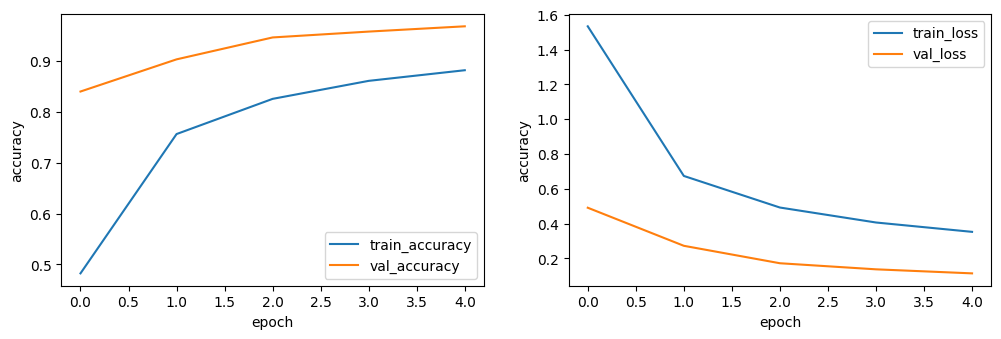

In [59]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)